In [4]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from fastf1 import utils
import pandas as pd
import numpy as np
plotting.setup_mpl()
ff1.Cache.enable_cache('cache') 

session = ff1.get_session(2023, 'Austin', 'Q')
session.load()

core           INFO 	Loading data for United States Grand Prix - Qualifying [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
c:\Users\Varun\AppData\Local\Progr

Qualifying Analysis

In [118]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['LEC' 'NOR' 'HAM' 'SAI' 'RUS' 'VER' 'GAS' 'OCO' 'PER' 'PIA' 'TSU' 'ZHO'
 'BOT' 'MAG' 'RIC' 'HUL' 'ALO' 'ALB' 'STR' 'SAR']


In [119]:
fastest_laps = []
for driver in drivers:
    fastest = session.laps.pick_driver(driver).pick_fastest()
    fastest_laps.append(fastest)

In [120]:
from fastf1.core import Laps
from timple.timedelta import strftimedelta

fastest_laps = Laps(fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [121]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [122]:
fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']]

,Driver,LapTime,LapTimeDelta
0,LEC,0 days 00:01:34.723000,0 days 00:00:00
1,NOR,0 days 00:01:34.853000,0 days 00:00:00.130000
2,HAM,0 days 00:01:34.862000,0 days 00:00:00.139000
3,SAI,0 days 00:01:34.945000,0 days 00:00:00.222000
4,RUS,0 days 00:01:35.079000,0 days 00:00:00.356000
5,VER,0 days 00:01:35.081000,0 days 00:00:00.358000
6,GAS,0 days 00:01:35.089000,0 days 00:00:00.366000
7,OCO,0 days 00:01:35.154000,0 days 00:00:00.431000
8,PER,0 days 00:01:35.173000,0 days 00:00:00.450000
9,PIA,0 days 00:01:35.467000,0 days 00:00:00.744000


In [123]:
team_colors = []
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

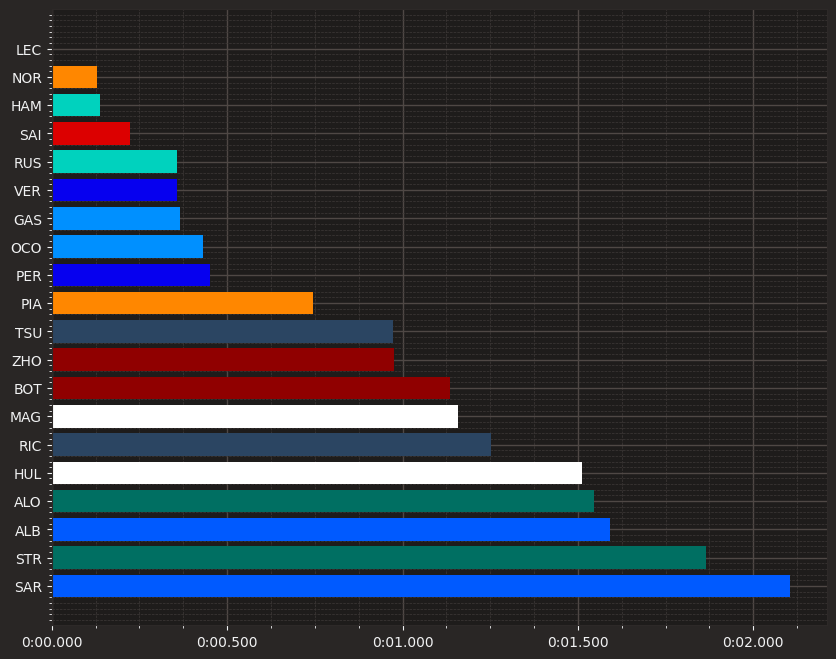

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors)
ax.set_yticks(fastest_laps.index)

ax.set_yticklabels(fastest_laps['Driver'])
# show fastest at the top
ax.invert_yaxis()

In [80]:
fastest_D1 = session.laps.pick_driver(drivers[0]).pick_fastest()
fastest_D2 = session.laps.pick_driver(drivers[1]).pick_fastest()
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_D1, fastest_D2)

Text(0.5, 0, 'Distance [m]')

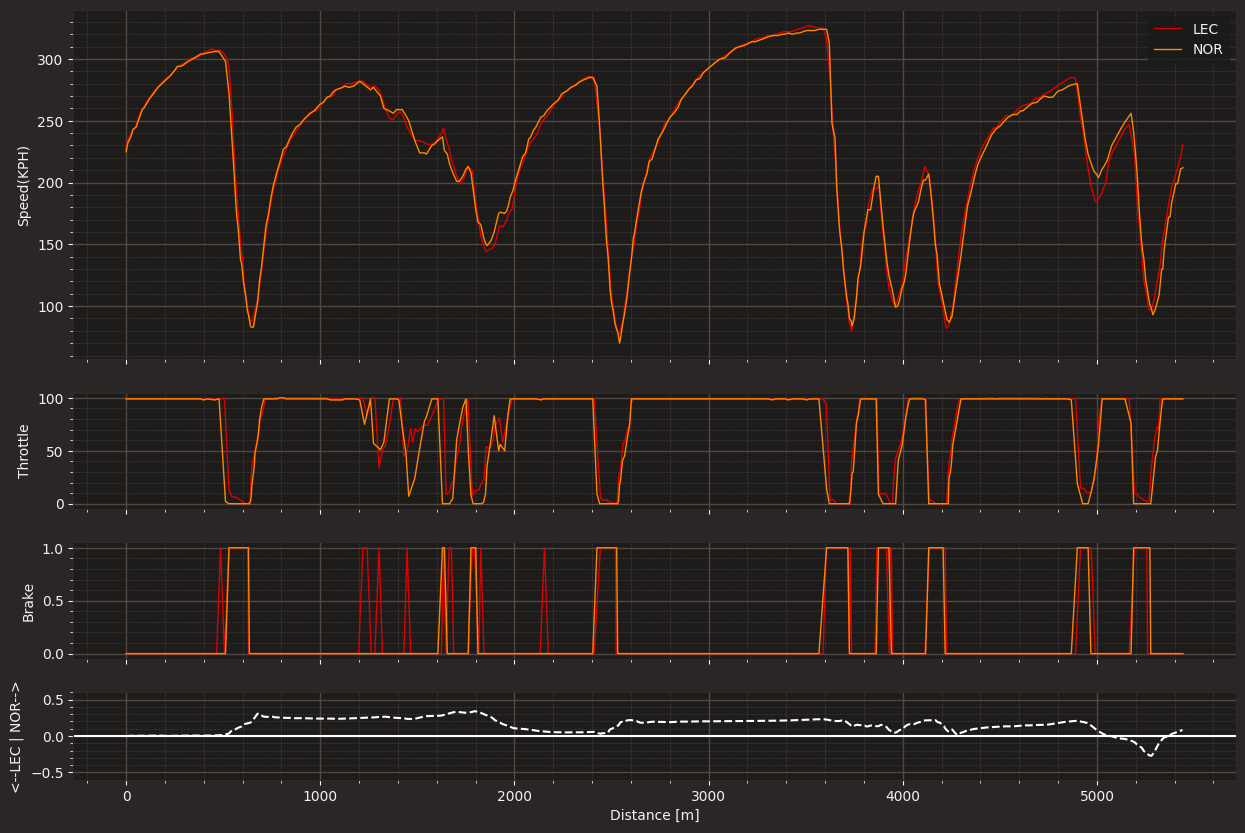

In [81]:
fig, axs = plt.subplots(4,1,figsize=(15,10),gridspec_kw={'height_ratios': [3, 1,1,0.75]},sharex=True)
params = ['Speed','Throttle','Brake']
for i in range(len(axs)-1):
        axs[i].plot(ref_tel['Distance'], ref_tel[params[i]], color=plotting.team_color(fastest_D1['Team']),lw = 1)
        axs[i].plot(compare_tel['Distance'], compare_tel[params[i]], color=plotting.team_color(fastest_D2['Team']) ,lw = 1)

axs[0].legend(labels=[drivers[0], drivers[1]])

axs[3].axhline(0, color='white')
axs[3].set_ylim(-0.6, 0.6)
axs[3].plot(ref_tel['Distance'], delta_time, '--', color='white')

axs[0].set_ylabel("Speed(KPH)")
axs[1].set_ylabel("Throttle")
axs[2].set_ylabel("Brake")

axs[3].set_ylabel(f"<--{drivers[0]} | {drivers[1]}-->")
axs[-1].set_xlabel('Distance [m]')

Race Analysis

In [5]:
# Retrieve FastF1 session data
session_race = ff1.get_session(2023, 'Austin', 'R')
laps=session_race.load_laps(with_telemetry=True)

c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for United States Grand Prix - Race [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\fa

In [11]:
drivers = ['VER','HAM', 'NOR', 'LEC', 'PER', 'SAI']
pace = []
fastest_laps = []
for driver in drivers:
    pace.append(session_race.laps.loc[session_race.laps['Driver'] == driver])
    fastest_laps.append(session_race.laps.pick_driver(driver).pick_fastest())

In [12]:
for i in range(0, len(pace)):
    pace[i]['LapTime(s)'] = pace[i]['LapTime'].dt.total_seconds()

C:\Users\Varun\AppData\Local\Temp\ipykernel_7984\3547497678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace[i]['LapTime(s)'] = pace[i]['LapTime'].dt.total_seconds()
C:\Users\Varun\AppData\Local\Temp\ipykernel_7984\3547497678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace[i]['LapTime(s)'] = pace[i]['LapTime'].dt.total_seconds()
C:\Users\Varun\AppData\Local\Temp\ipykernel_7984\3547497678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [13]:
import numpy as np
for i in range(0,len(pace)):
    mean = pace[i]['LapTime(s)'].mean()
    std_val= pace[i]['LapTime(s)'].std()
    z_thres = 1.3
    z_scores = np.abs((pace[i]['LapTime(s)'] - mean)/std_val)
    pace[i]['LapTime(s)'][z_scores > z_thres] = None

C:\Users\Varun\AppData\Local\Temp\ipykernel_7984\414670374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace[i]['LapTime(s)'][z_scores > z_thres] = None


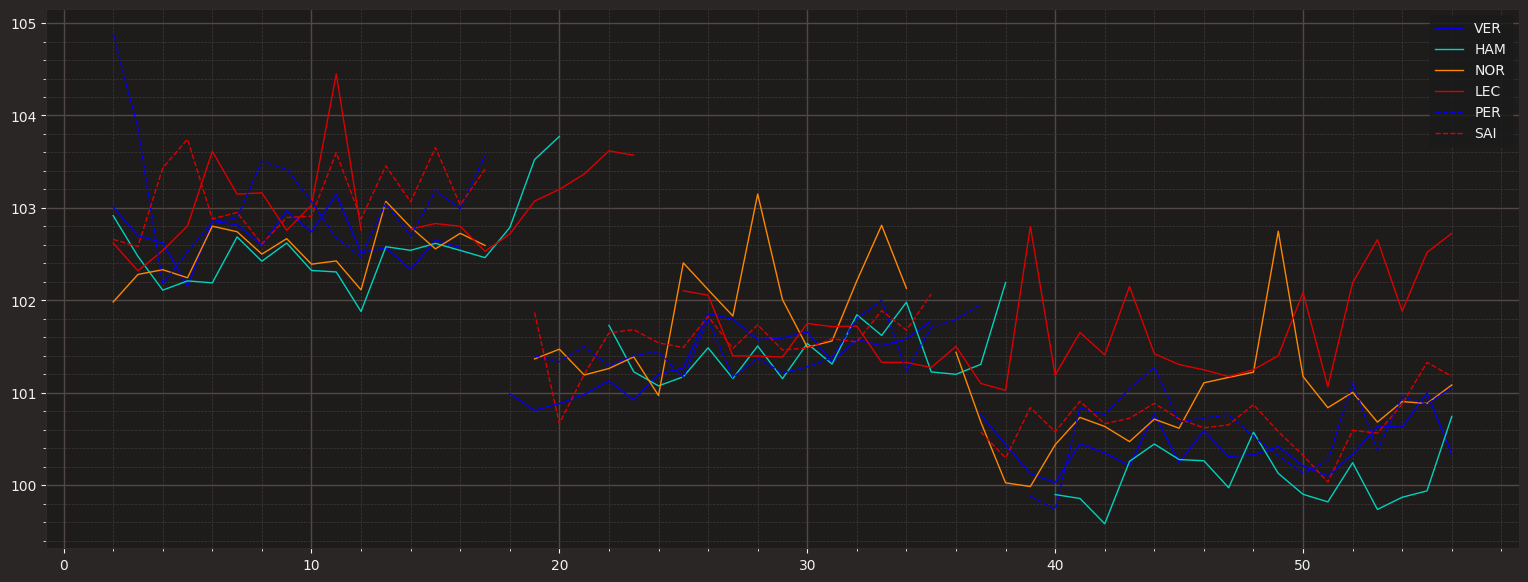

In [14]:
color = []
fig1, ax = plt.subplots(figsize = (19,7))
for i, p in enumerate(pace):
    if fastest_laps[i]['Team'] not in color:
        ax.plot(p['LapNumber'], p['LapTime(s)'],marker = '',color=plotting.team_color(fastest_laps[i]['Team']),lw = 1, label = drivers[i])
    else:
        ax.plot(p['LapNumber'], p['LapTime(s)'],marker = '',linestyle = '--', color=plotting.team_color(fastest_laps[i]['Team']),lw = 1, label = drivers[i])
    color.append(fastest_laps[i]['Team'])

plt.legend()

LapTime Predictor

In [197]:
HAM_fs = pace[1].loc[(pace[1]['LapNumber']>1) & (pace[1]['LapNumber']<=20)] #Hamilton's first stinct

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [199]:
HAM_fs.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate', 'LapTime(s)'],
      dtype='object')

In [200]:
HAM_fs['FreshTyre'] = HAM_fs['FreshTyre'].map({True: 1, False: 0})

C:\Users\Varun\AppData\Local\Temp\ipykernel_7984\1737213761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAM_fs['FreshTyre'] = HAM_fs['FreshTyre'].map({True: 1, False: 0})


In [201]:
X = HAM_fs[['FreshTyre', 'TyreLife']].values
y = HAM_fs['LapTime(s)'].values

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [208]:
# Create polynomial features (e.g., degree 2)
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [209]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [210]:
# Generate test data (replace with your actual test data)
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)


In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error: 0.16
Mean Squared Error: 0.03
R-squared (R2): 0.73


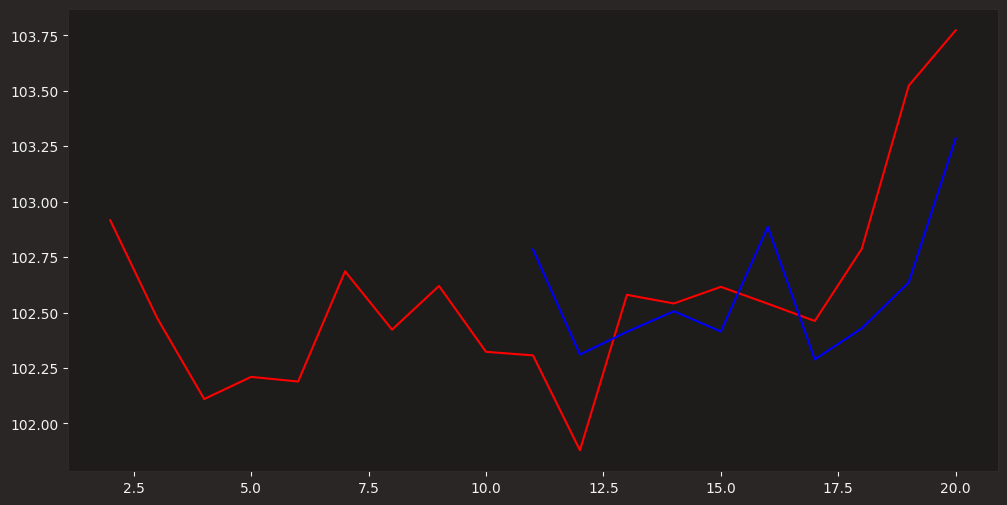

In [212]:
plt.figure(figsize=(12, 6))
plt.plot(HAM_fs['LapNumber'], HAM_fs['LapTime(s)'], label='Actual' , color = 'red')
plt.plot(HAM_fs['LapNumber'][-len(y_test):], y_pred, label = 'Predicted', color = 'blue')